In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [2]:
blk=pd.read_csv("https://raw.githubusercontent.com/stellahrotich/MLProjects101/master/BlackFriday.csv")


In [3]:
blk.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
blk = blk.astype({"Occupation": str}, errors='ignore') 
blk = blk.astype({"Product_Category_1": str}, errors='ignore')
blk = blk.astype({"Marital_Status": str}, errors='ignore')

In [5]:
blk.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [6]:
blk.shape

(537577, 12)

In [7]:
blk.Gender.describe()

count     537577
unique         2
top            M
freq      405380
Name: Gender, dtype: object

<AxesSubplot:xlabel='Gender', ylabel='count'>

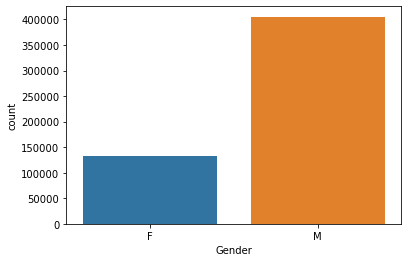

In [8]:
sns.countplot(x="Gender",data=blk)

In [9]:
blk.Age.describe()

count     537577
unique         7
top        26-35
freq      214690
Name: Age, dtype: object

In [10]:
blk.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

<AxesSubplot:xlabel='Age', ylabel='count'>

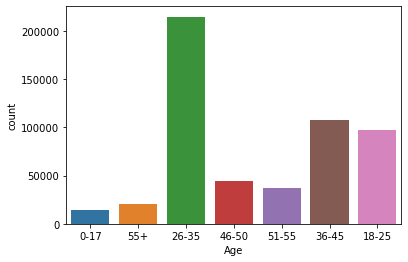

In [11]:
sns.countplot(x="Age",data=blk)

In [12]:
blk.Occupation.describe()

count     537577
unique        21
top            4
freq       70862
Name: Occupation, dtype: object

In [13]:
blk.Occupation.nunique()

21

<AxesSubplot:xlabel='Occupation', ylabel='count'>

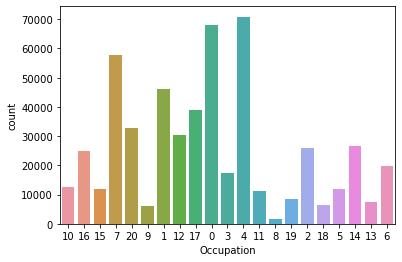

In [14]:
sns.countplot(x="Occupation",data=blk)

In [15]:
blk.City_Category.describe()

count     537577
unique         3
top            B
freq      226493
Name: City_Category, dtype: object

In [16]:
blk.City_Category.nunique()

3

<AxesSubplot:xlabel='City_Category', ylabel='count'>

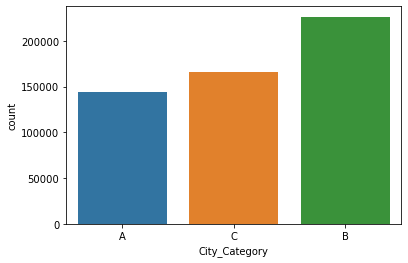

In [17]:
sns.countplot(x="City_Category",data=blk)

In [18]:
blk.Stay_In_Current_City_Years.describe()

count     537577
unique         5
top            1
freq      189192
Name: Stay_In_Current_City_Years, dtype: object

In [19]:
blk.Stay_In_Current_City_Years.nunique()

5

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

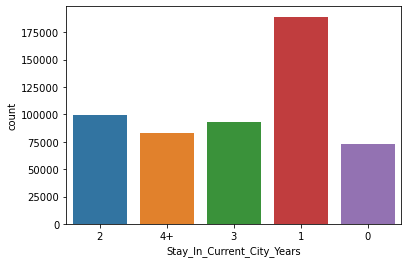

In [20]:
sns.countplot(x="Stay_In_Current_City_Years",data=blk)

In [21]:
blk.Marital_Status.describe()

count     537577
unique         2
top            0
freq      317817
Name: Marital_Status, dtype: object

In [22]:
blk.Marital_Status.nunique()

2

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

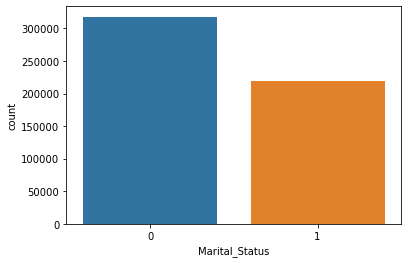

In [23]:
sns.countplot(x="Marital_Status",data=blk)

In [24]:
blk.Product_Category_1.describe()

count     537577
unique        18
top            5
freq      148592
Name: Product_Category_1, dtype: object

In [25]:
blk.Product_Category_1.nunique()

18

<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

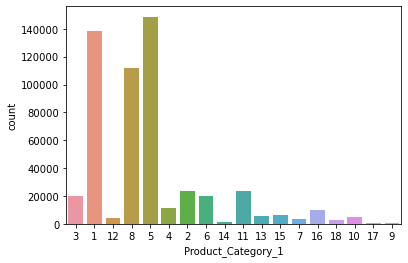

In [26]:
sns.countplot(x="Product_Category_1",data=blk)

In [27]:
blk.Product_Category_2.describe()

count    370591.000000
mean          9.842144
std           5.087259
min           2.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          18.000000
Name: Product_Category_2, dtype: float64

In [28]:
blk.Product_Category_2.isnull().sum()

166986

In [29]:
blk.Product_Category_2.nunique()

17

In [30]:
blk.Product_Category_2.fillna("Others",inplace=True)

In [31]:
blk.Product_Category_3.describe()

count    164278.000000
mean         12.669840
std           4.124341
min           3.000000
25%           9.000000
50%          14.000000
75%          16.000000
max          18.000000
Name: Product_Category_3, dtype: float64

In [32]:
blk.Product_Category_3.isnull().mean()

0.6944102891306734

In [33]:
blk.drop(["User_ID","Product_ID","Product_Category_3"],axis=1,inplace=True)

In [34]:
blk.shape

(537577, 9)

In [35]:
X=blk[["Gender","Age","Occupation","City_Category","Stay_In_Current_City_Years","Marital_Status","Product_Category_1","Product_Category_2"]]

In [36]:
X.shape

(537577, 8)

In [37]:
X1=pd.get_dummies(X)

In [38]:
X1.shape

(537577, 76)

In [39]:
X1.head(4)

,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Occupation_0,...,Product_Category_2_10.0,Product_Category_2_11.0,Product_Category_2_12.0,Product_Category_2_13.0,Product_Category_2_14.0,Product_Category_2_15.0,Product_Category_2_16.0,Product_Category_2_17.0,Product_Category_2_18.0,Product_Category_2_Others
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X1)
scaled_data=scaler.transform(X1)

In [41]:
x= pd.DataFrame(scaled_data)
x.head()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [42]:
y=blk.Purchase

In [43]:
x_train,x_test,y_train,y_test= train_test_split(x,y,train_size = 0.8, test_size = 0.2,random_state =50)

In [44]:
from sklearn.decomposition import PCA

In [45]:
pca=PCA()
pca.fit(x_train)

PCA()

In [46]:
ratio=pca.explained_variance_ratio_

In [47]:
ratio.shape

(76,)

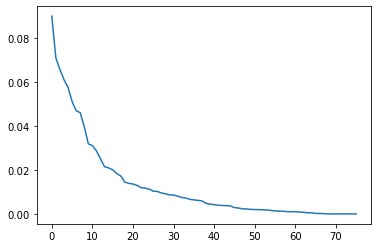

In [48]:
plt.plot(ratio)

In [49]:
import numpy as np

In [50]:
ratio_cum=np.cumsum(ratio)

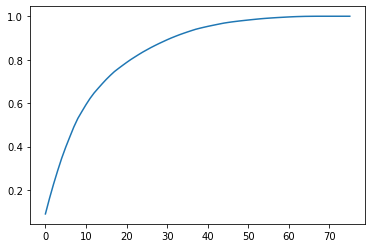

In [51]:
plt.plot(ratio_cum)

<h1>Principle component analysis<h1>

In [52]:
pca=PCA(n_components=56).fit(x_train)
components=pca.transform(x_train)

In [53]:
components=pd.DataFrame(components)

In [54]:
components.head()

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
0,-0.732046,0.089926,0.166775,1.391401,0.038641,-0.408366,0.029763,0.451130,-0.127233,-0.692682,...,0.027031,0.011187,-0.015981,-0.001792,-0.022746,0.011659,0.004663,0.004769,0.001230,-0.006167
1,0.711247,-0.551060,0.156823,0.802181,0.674993,-0.561832,0.239413,0.046565,-0.022926,0.766880,...,0.050266,-0.024145,0.095417,0.023600,-0.011742,0.011453,0.021328,-0.008996,0.027435,-0.051839
2,-0.431677,1.079199,-0.508300,-0.236325,0.828707,0.754747,-0.145190,-0.726552,-0.070688,0.135688,...,-0.076407,-0.054183,-0.051908,-0.035024,-0.044491,-0.045104,-0.029666,0.004526,0.062787,-0.034886
3,1.020661,0.877748,-0.467498,-0.845743,0.336415,0.447046,0.318073,0.055317,-0.052335,0.062845,...,-0.075311,-0.029482,-0.006211,0.010566,-0.018740,-0.039648,-0.038737,-0.009446,-0.019870,0.006343
4,-0.653658,-0.502109,0.168687,0.780161,0.625431,-0.367476,0.039122,-0.096095,0.362091,-0.566969,...,-0.073227,0.005081,0.000752,0.023879,-0.014753,0.008203,-0.032609,-0.000966,-0.016267,0.004890


<h2>Linear Regression</h2>

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [63]:
model=LinearRegression().fit(x,y)

In [64]:
model.score(x,y)

0.6340395131499134

In [56]:
model=LinearRegression().fit(x_train,y_train)
print("Train Score =",model.score(x_train,y_train))
print("Test Score =",model.score(x_test,y_test))

Train Score = 0.6337728388728969
Test Score = 0.6350383625722666


In [65]:
import pickle

In [66]:
file=open('linear_regression.pkl','wb')

In [76]:
pickle.dump(model,file)

<h2>DecisionTreeRegressor</h2>

In [57]:
model1=DecisionTreeRegressor().fit(x_train,y_train)
print("Train Score =",model1.score(x_train,y_train))
print("Test Score =",model1.score(x_test,y_test))

Train Score = 0.7414397697107934
Test Score = 0.6001273320250664


<h2>RandomForestRegressor</h2>

In [58]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=10,random_state=0)
regressor.fit(x_train,y_train)


RandomForestRegressor(n_estimators=10, random_state=0)

In [59]:
 y_pred=regressor.predict(x_test)


In [60]:
regressor.score(x_train,y_train)


0.7316611288308819

In [61]:
regressor.score(x_test,y_test)


0.6272810366428978